# Sentiment analysis

In [52]:
#Importing Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer

import re, string

import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

import xgboost as xgb
from xgboost import XGBClassifier

In [2]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\moham\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\moham\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\moham\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\moham\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
#Read DataSet
df = pd.read_csv('Amazon_products_comments.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (1,10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
df.shape

(34660, 21)

In [5]:
df.head(5)

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34660 non-null  object 
 1   name                  27900 non-null  object 
 2   asins                 34658 non-null  object 
 3   brand                 34660 non-null  object 
 4   categories            34660 non-null  object 
 5   keys                  34660 non-null  object 
 6   manufacturer          34660 non-null  object 
 7   reviews.date          34621 non-null  object 
 8   reviews.dateAdded     24039 non-null  object 
 9   reviews.dateSeen      34660 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   34066 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    34131 non-null  float64
 14  reviews.rating        34627 non-null  float64
 15  reviews.sourceURLs 

In [7]:
# #drop columns that wouldn't affect training 
df1=df.drop(['name','asins','brand','categories','keys','manufacturer','reviews.id','reviews.didPurchase',
             'reviews.date','reviews.dateAdded','reviews.dateSeen','reviews.numHelpful', 'reviews.sourceURLs',
             'reviews.title','reviews.userCity','reviews.userProvince','reviews.username'],axis=1)
#drop Null values
df1.dropna(inplace=True)
df1.head(5)

,id,reviews.doRecommend,reviews.rating,reviews.text
0,AVqkIhwDv8e3D1O-lebb,True,5.0,This product so far has not disappointed. My c...
1,AVqkIhwDv8e3D1O-lebb,True,5.0,great for beginner or experienced person. Boug...
2,AVqkIhwDv8e3D1O-lebb,True,5.0,Inexpensive tablet for him to use and learn on...
3,AVqkIhwDv8e3D1O-lebb,True,4.0,I've had my Fire HD 8 two weeks now and I love...
4,AVqkIhwDv8e3D1O-lebb,True,5.0,I bought this for my grand daughter when she c...


In [8]:
df1.shape

(34066, 4)

In [9]:
#minimize the DataSetto 20K records to ease training and traing faster
df1=df1[0:20000]

In [10]:
df1.shape

(20000, 4)

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 0 to 20443
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   20000 non-null  object 
 1   reviews.doRecommend  20000 non-null  object 
 2   reviews.rating       20000 non-null  float64
 3   reviews.text         20000 non-null  object 
dtypes: float64(1), object(3)
memory usage: 781.2+ KB


## Text PreProcessing

In [12]:
#putting all letters in lower case
df1['reviews.text']=df1['reviews.text'].str.lower()
#deleting leading and trailing spaces
df1['reviews.text']=df1['reviews.text'].str.strip()

In [13]:
df1.head(5)

,id,reviews.doRecommend,reviews.rating,reviews.text
0,AVqkIhwDv8e3D1O-lebb,True,5.0,this product so far has not disappointed. my c...
1,AVqkIhwDv8e3D1O-lebb,True,5.0,great for beginner or experienced person. boug...
2,AVqkIhwDv8e3D1O-lebb,True,5.0,inexpensive tablet for him to use and learn on...
3,AVqkIhwDv8e3D1O-lebb,True,4.0,i've had my fire hd 8 two weeks now and i love...
4,AVqkIhwDv8e3D1O-lebb,True,5.0,i bought this for my grand daughter when she c...


In [14]:
#deleting HTML tags
df1['reviews.text']=df1['reviews.text'].map(lambda x: re.compile('<.*?>').sub('', x))                            

In [15]:
#removing punctuation
df1['reviews.text']=df1['reviews.text'].map(lambda x: re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', x))

In [16]:
#removing extra spaces
df1['reviews.text']=df1['reviews.text'].map(lambda x: re.sub('\s+', ' ', x))

In [17]:
#tokenikzing and removing stop words
stop_words = set(stopwords.words('english'))  

In [18]:
#Function to delete stop words
def stop_words_delete(sentence):
    # Tokenize the sentence
    tokenized_words = word_tokenize(sentence)
    
    filtered_sentence=[]
    
    for word in tokenized_words:
        if word not in stop_words:
            filtered_sentence.append(word)
    final_sentence=" ".join(filtered_sentence)
    
    return final_sentence

df1['reviews.text']=df1['reviews.text'].map(lambda x: stop_words_delete(x))

In [19]:
df1.head()

,id,reviews.doRecommend,reviews.rating,reviews.text
0,AVqkIhwDv8e3D1O-lebb,True,5.0,product far disappointed children love use lik...
1,AVqkIhwDv8e3D1O-lebb,True,5.0,great beginner experienced person bought gift ...
2,AVqkIhwDv8e3D1O-lebb,True,5.0,inexpensive tablet use learn step nabi thrille...
3,AVqkIhwDv8e3D1O-lebb,True,4.0,fire hd 8 two weeks love tablet great value pr...
4,AVqkIhwDv8e3D1O-lebb,True,5.0,bought grand daughter comes visit set user ent...


In [20]:
#Lemmatization Process
wl=WordNetLemmatizer()

#getting the type of each word to pass to Lemmatizer
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

#Function to do Lemmatization
def lemmatization_process(sentence):

    lemmatized_sentence = []
    # Tokenize the sentence
    tokenized_words = word_tokenize(sentence)
    # Get position tags
    word_pos_tags = nltk.pos_tag(tokenized_words)
    
    # Map the position tag and lemmatize the word/token
    for idx, tag in enumerate(word_pos_tags):
        lemmatized_sentence.append(wl.lemmatize(tag[0], get_wordnet_pos(tag[1])))

    lemmatized_text = " ".join(lemmatized_sentence) 
    
    return lemmatized_text

#Lemmatization
df1['reviews.text']=df1['reviews.text'].map(lambda x: lemmatization_process(x))

In [21]:
df1.head()

,id,reviews.doRecommend,reviews.rating,reviews.text
0,AVqkIhwDv8e3D1O-lebb,True,5.0,product far disappointed child love use like a...
1,AVqkIhwDv8e3D1O-lebb,True,5.0,great beginner experience person buy gift love
2,AVqkIhwDv8e3D1O-lebb,True,5.0,inexpensive tablet use learn step nabi thrill ...
3,AVqkIhwDv8e3D1O-lebb,True,4.0,fire hd 8 two week love tablet great value pri...
4,AVqkIhwDv8e3D1O-lebb,True,5.0,buy grand daughter come visit set user enter a...


In [22]:
#Tokenize the Reviews Column
df1['tokenized_text']=df1['reviews.text'].apply(lambda x: word_tokenize(x) )

In [23]:
df1.head()

,id,reviews.doRecommend,reviews.rating,reviews.text,tokenized_text
0,AVqkIhwDv8e3D1O-lebb,True,5.0,product far disappointed child love use like a...,"[product, far, disappointed, child, love, use,..."
1,AVqkIhwDv8e3D1O-lebb,True,5.0,great beginner experience person buy gift love,"[great, beginner, experience, person, buy, gif..."
2,AVqkIhwDv8e3D1O-lebb,True,5.0,inexpensive tablet use learn step nabi thrill ...,"[inexpensive, tablet, use, learn, step, nabi, ..."
3,AVqkIhwDv8e3D1O-lebb,True,4.0,fire hd 8 two week love tablet great value pri...,"[fire, hd, 8, two, week, love, tablet, great, ..."
4,AVqkIhwDv8e3D1O-lebb,True,5.0,buy grand daughter come visit set user enter a...,"[buy, grand, daughter, come, visit, set, user,..."


In [24]:
df1['reviews.doRecommend'].unique()

array([True, False], dtype=object)

In [25]:
#converting reviews.doRecommend column into numerical state
df1['reviews.doRecommend']=df1['reviews.doRecommend'].apply(lambda x: 0 if x == False else 1)

In [26]:
df1['reviews.doRecommend'].unique()

array([1, 0], dtype=int64)

In [27]:
# Splitting the Data Set into Train and Test Sets
x=df1['reviews.text']
y=df1['reviews.doRecommend'] 

In [28]:
# Splitting Dataset into train and test set 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [29]:
# Print train and test set shape
print ('Train Set Shape\t\t:{}\nTest Set Shape\t\t:{}'.format(x_train.shape, x_test.shape))

Train Set Shape		:(16000,)
Test Set Shape		:(4000,)


In [30]:
t=0
f=0
for i in y_train:
    if i == 1:
        t+=1
    elif i == 0:
        f+=1    

In [31]:
print(f)
print(t)

708
15292


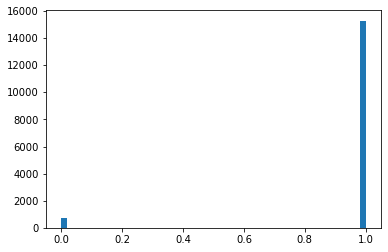

In [32]:
plt.hist(y_train,bins=50)
plt.show()

In [33]:
# Create the word vector with CountVectorizer Using N-gram
count_vect = CountVectorizer(ngram_range=(1,1))
count_vect_train = count_vect.fit_transform(x_train)
count_vect_train = count_vect_train.toarray()
count_vect_test = count_vect.transform(x_test)
count_vect_test = count_vect_test.toarray()

In [34]:
# Print vocabulary length
print('Vocabulary length :', len(count_vect.get_feature_names()))

Vocabulary length : 7239


In [35]:
# Assign feature names of vector into a variable
vocab = count_vect.get_feature_names()

In [36]:
# Dataframe for train countvectorizer dataset
pd.DataFrame(count_vect_train, columns = vocab).head()

,00,000,01,06,0ne,10,100,1000,1005,1024,...,yr,yrs,yup,z3,zero,zinio,zippy,zone,zoom,zooming
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
#Function to apply different models
def modeling(Model, xtrain = count_vect_train, xtest = count_vect_test):
    
    # Instantiate the classifier: model
    model = Model
    
    # Fitting classifier to the Training set (all features)
    model.fit(xtrain, y_train)
    
    global y_pred
    # Predicting the Test set results
    y_pred = model.predict(xtest)
    
    # Assign f1 score to a variable
    score = f1_score(y_test, y_pred, average = 'weighted')
    
    # Printing evaluation metric (f1-score) 
    print("f1 score: {}".format(score)*100)

In [38]:
# Call the modeling function for XGBoost with countvectorizer and print f1 score
modeling(XGBClassifier())

# Assign y_pred to a variable for further process
y_pred_cv_xgb = y_pred

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:53:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
f1 score: 0.9510022938367692


In [39]:
#Accuracy Score
print('Accuracy Score: {}%'.format(( accuracy_score(y_test,y_pred)*100)))

Accuracy Score: 96.15%


Text(0.5, 15.0, 'Predicted')

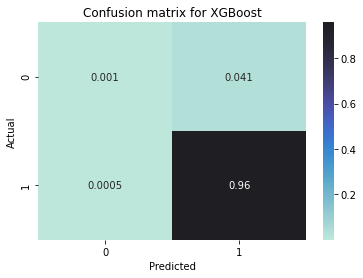

In [48]:
#Confusion Matix For XGBoost
plt.figure()
cm= confusion_matrix(y_test,y_pred)
sns.heatmap(cm/np.sum(cm),annot=True,center=True)
plt.ylabel('Actual')
plt.title('Confusion matrix for XGBoost')
plt.xlabel('Predicted')

In [54]:
#Calling Random Forest
# Call the modeling function for XGBoost with countvectorizer and print f1 score
modeling(RandomForestClassifier(n_estimators = 200))

# Assign y_pred to a variable for further process
y_pred_cv_xgb = y_pred
print(classification_report(y_test, y_pred))

f1 score: 0.9401161067604662
              precision    recall  f1-score   support

           0       0.80      0.02      0.05       167
           1       0.96      1.00      0.98      3833

    accuracy                           0.96      4000
   macro avg       0.88      0.51      0.51      4000
weighted avg       0.95      0.96      0.94      4000



Text(0.5, 15.0, 'Predicted')

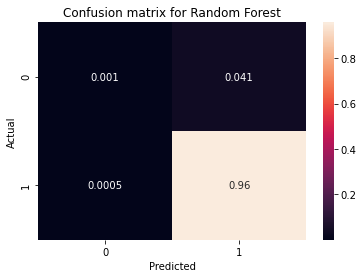

In [49]:
#Confusion Matix For Random Forest
plt.figure()
cm= confusion_matrix(y_test,y_pred)
sns.heatmap(cm/np.sum(cm),annot=True)
plt.title('Confusion matrix for Random Forest')
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [53]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.02      0.05       167
           1       0.96      1.00      0.98      3833

    accuracy                           0.96      4000
   macro avg       0.81      0.51      0.51      4000
weighted avg       0.95      0.96      0.94      4000

